In [33]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN


# **3. Modeling**

* Nesta secção iremos testar os modelos propostos. A discussão dos resultados obtidos encontra-se na fase seguinte, ou seja, no ficheiro Evaltuation.ipynb

## Importação do *dataset* normalizado

In [34]:
data_path = '../data/' 
cvd_df_processed = pd.read_csv(data_path + 'CVD_normalized_discretized_processed.csv')

# Separar atributos (X) e o alvo (y)
X = cvd_df_processed.drop(columns=['Heart_Disease'])  # Substitua 'Heart_Disease' pelo nome exato do atributo alvo, se for diferente
y = cvd_df_processed['Heart_Disease']

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Algoritmos de Aprendizagem Supervisionada

### *Decision Trees*

Acurácia do modelo Decision Tree: 0.92

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.53      0.03      0.06      4997

    accuracy                           0.92     61771
   macro avg       0.73      0.51      0.51     61771
weighted avg       0.89      0.92      0.89     61771



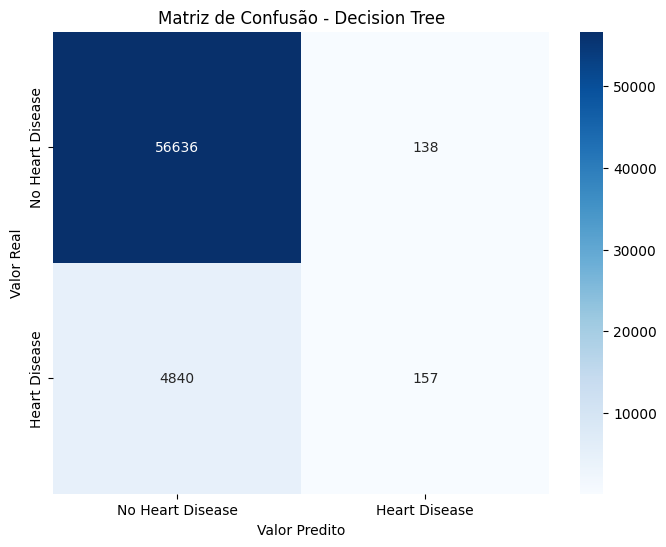


Importância dos Atributos:
                              Importância
Age_Category                     0.500666
Diabetes                         0.200008
General_Health                   0.165231
Sex                              0.104462
Arthritis                        0.025754
Smoking_History                  0.003878
Checkup                          0.000000
Exercise                         0.000000
Skin_Cancer                      0.000000
Other_Cancer                     0.000000
Height_(cm)                      0.000000
Depression                       0.000000
Weight_(kg)                      0.000000
BMI                              0.000000
Alcohol_Consumption              0.000000
Fruit_Consumption                0.000000
Green_Vegetables_Consumption     0.000000
FriedPotato_Consumption          0.000000
BMI_classes                      0.000000
Alcohol_Consumption_class        0.000000


In [35]:
# Inicializar o modelo Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Ajuste max_depth conforme necessário

# Treinar o modelo com os dados de treino
dt_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = dt_model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo Decision Tree: {accuracy:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - Decision Tree")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

# Importância dos atributos
feature_importances = pd.DataFrame(dt_model.feature_importances_, index=X.columns, columns=['Importância'])
feature_importances = feature_importances.sort_values(by='Importância', ascending=False)
print("\nImportância dos Atributos:")
print(feature_importances)


### *Multi-Layer Perception* (MLP)

Acurácia do modelo MLP: 0.92

Relatório de Classificação (MLP):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56774
           1       0.49      0.05      0.09      4997

    accuracy                           0.92     61771
   macro avg       0.71      0.52      0.52     61771
weighted avg       0.89      0.92      0.89     61771



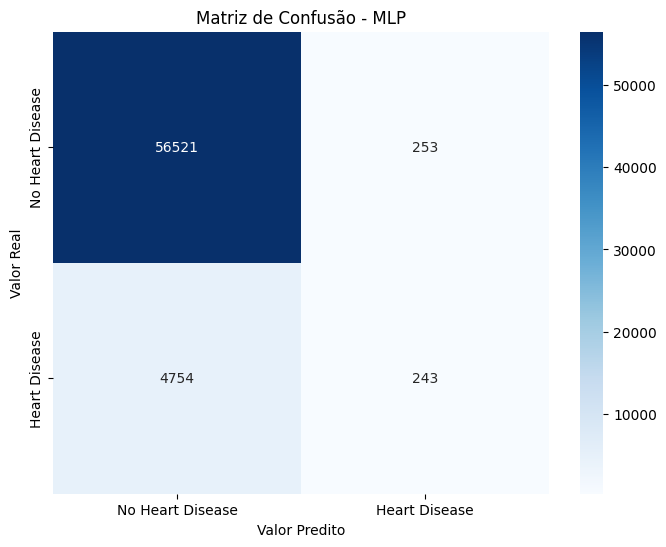

In [36]:
# Inicializar o modelo MLP
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100),  # Uma camada oculta com 100 neurônios
    activation='relu',          # Função de ativação ReLU
    solver='adam',              # Otimizador Adam
    max_iter=300,               # Número máximo de iterações
    random_state=42             # Para reprodutibilidade
)

# Treinar o modelo com os dados de treino
mlp_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_mlp = mlp_model.predict(X_test)

# Avaliar o modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Acurácia do modelo MLP: {accuracy_mlp:.2f}")
print("\nRelatório de Classificação (MLP):")
print(classification_report(y_test, y_pred_mlp))

# Matriz de confusão
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - MLP")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()


### *k-Nearest Neighbors*

Acurácia do modelo K-NN: 0.91

Relatório de Classificação (K-NN):
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56774
           1       0.30      0.08      0.13      4997

    accuracy                           0.91     61771
   macro avg       0.61      0.53      0.54     61771
weighted avg       0.87      0.91      0.89     61771



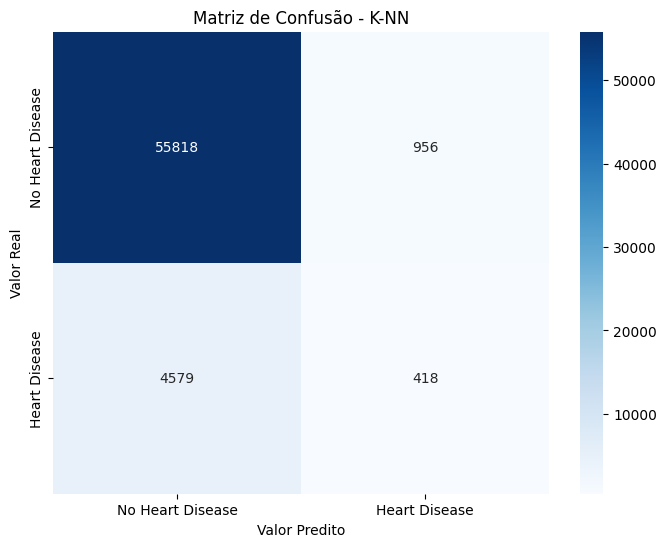

In [37]:
# Inicializar o modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5,     # Número de vizinhos (ajuste conforme necessário)
                                 weights='uniform',  # Pesos uniformes ou baseados na distância
                                 algorithm='auto',   # Algoritmo para calcular os vizinhos
                                 metric='minkowski', # Distância padrão (Minkowski, similar à Euclidiana)
                                 n_jobs=-1)          # Utilizar todos os núcleos para otimizar a execução

# Treinar o modelo com os dados de treino
knn_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_knn = knn_model.predict(X_test)

# Avaliar o modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Acurácia do modelo K-NN: {accuracy_knn:.2f}")
print("\nRelatório de Classificação (K-NN):")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusão
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title("Matriz de Confusão - K-NN")
plt.ylabel("Valor Real")
plt.xlabel("Valor Predito")
plt.show()

## Algoritmos de Aprendizagem Não-Supervisionada

### *k-Means*

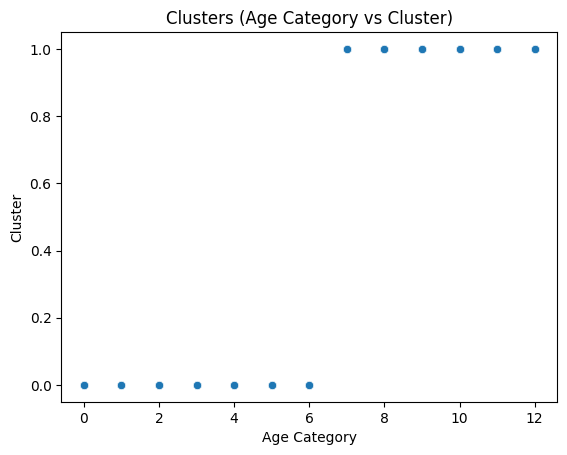

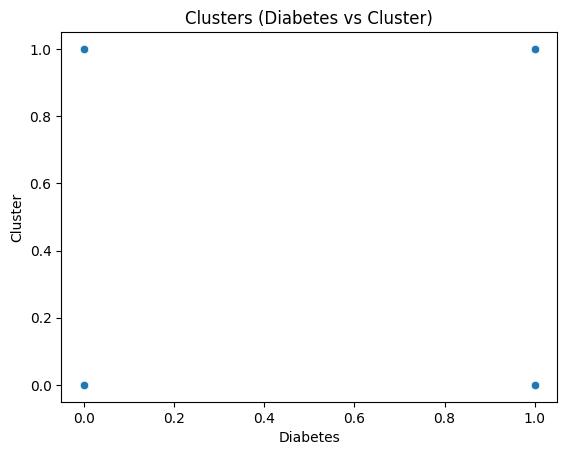

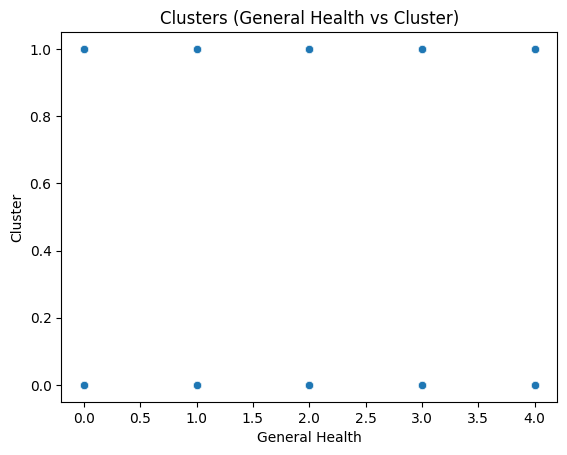


Características médias de cada cluster:
         Age_Category  Diabetes  General_Health
Cluster                                        
0            3.236837  0.057401        2.228262
1            9.302408  0.190999        2.311028


In [39]:
# Selecionar as variáveis relevantes
features = ['Age_Category', 'Diabetes', 'General_Health']



kmeans = KMeans(n_clusters=2, random_state=42)
cvd_df_processed ['Cluster'] = kmeans.fit_predict(cvd_df_processed [features])

    # Verificar os centroides dos clusters
centroids = kmeans.cluster_centers_

    # Criar um DataFrame para visualizar os centroides
centroids_df = pd.DataFrame(centroids, columns=features)

    # Gráficos de dispersão (com Heart_Disease = 1)
    # 1. Age_Category vs Cluster
sns.scatterplot(x='Age_Category', y='Cluster', data=cvd_df_processed )
plt.title('Clusters (Age Category vs Cluster)')
plt.xlabel('Age Category')
plt.ylabel('Cluster')
plt.show()

    # 2. Diabetes vs Cluster
sns.scatterplot(x='Diabetes', y='Cluster', data=cvd_df_processed )
plt.title('Clusters (Diabetes vs Cluster)')
plt.xlabel('Diabetes')
plt.ylabel('Cluster')
plt.show()

    # 3. General_Health vs Cluster
sns.scatterplot(x='General_Health', y='Cluster', data=cvd_df_processed )
plt.title('Clusters (General Health vs Cluster)')
plt.xlabel('General Health')
plt.ylabel('Cluster')
plt.show()

    # Estudo dos clusters e suas características médias
cluster_summary = cvd_df_processed .groupby('Cluster')[features].mean()

print("\nCaracterísticas médias de cada cluster:")
print(cluster_summary)


### *DBScan*

* Utilizamos o dataframe completo

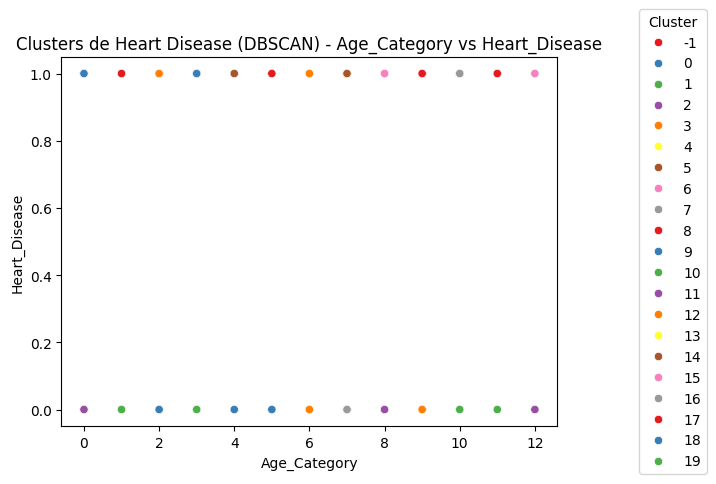

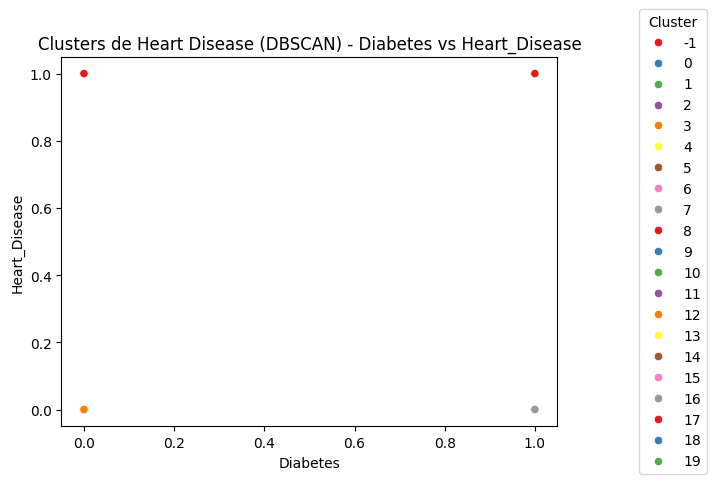

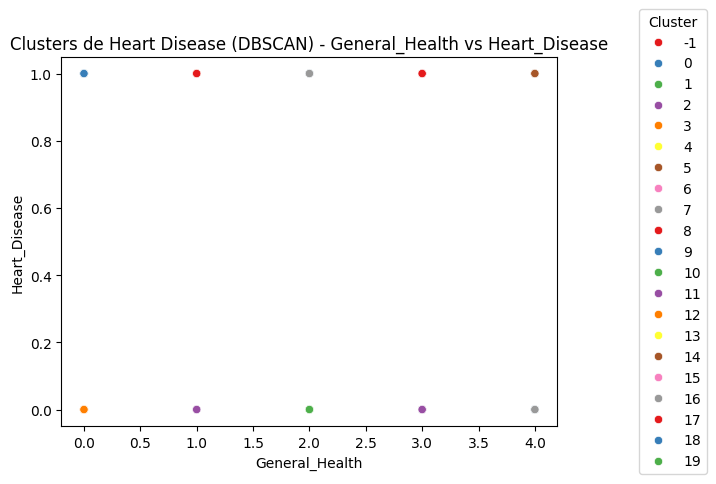

Cluster
 0     19830
 1     14506
 3     10833
 2      4291
 5      2541
 6      1518
 16     1430
 9      1205
 11     1059
 12      790
 14      773
 8       566
 7       532
 10      473
 15      373
 17      360
 4       293
 18      182
 13      181
 19       30
-1         5
Name: count, dtype: int64


In [40]:
# Selecionando as variáveis que você quer comparar com Heart_disease
features = ['Age_Category', 'Diabetes', 'General_Health', 'Heart_Disease']

# Amostrando 20% do dataset
cvd_df_sampled = cvd_df_processed.sample(frac=0.2, random_state=42)  # frac=0.2 para 20% do dataset

# Normalizar os dados antes de aplicar o DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cvd_df_sampled[features])

# Aplicar o DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps e min_samples conforme necessário
cvd_df_sampled['Cluster'] = dbscan.fit_predict(X_scaled)

# Visualizar os clusters gerados com relação a Heart_disease
# Gráfico Age_Category vs Heart_disease
sns.scatterplot(x='Age_Category', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (DBSCAN) - Age_Category vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Gráfico Diabetes vs Heart_disease
sns.scatterplot(x='Diabetes', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (DBSCAN) - Diabetes vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Gráfico General_Health vs Heart_disease
sns.scatterplot(x='General_Health', y='Heart_Disease', hue='Cluster', palette='Set1', data=cvd_df_sampled)
plt.title('Clusters de Heart Disease (DBSCAN) - General_Health vs Heart_Disease')
plt.legend(title='Cluster', bbox_to_anchor=(1.15, 0.5), loc='center left')
plt.show()

# Verificar a quantidade de pontos em cada cluster
print(cvd_df_sampled['Cluster'].value_counts())
